In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
X = np.random.rand(100, 1) * 6-3 
y = 0.5* X**2 + 1.5 * X + 2+ np.random.randn(100, 1) 

In [3]:
X

array([[-0.92698851],
       [-2.59925479],
       [ 2.63622365],
       [ 0.78486088],
       [ 0.92825064],
       [-2.85422954],
       [ 0.61221911],
       [-1.55076426],
       [-1.64227262],
       [-1.38244892],
       [ 1.87181926],
       [-1.49771918],
       [-0.17848605],
       [-1.60264771],
       [-2.33219795],
       [ 1.41140649],
       [ 2.51661339],
       [-0.674441  ],
       [ 2.49530616],
       [ 0.90283932],
       [-1.99705471],
       [-2.56291388],
       [ 0.55246594],
       [-2.05422208],
       [ 0.81033439],
       [ 0.72153293],
       [-2.4916869 ],
       [ 2.56339729],
       [-0.5782824 ],
       [ 1.3529064 ],
       [ 2.21385929],
       [-1.40955795],
       [-2.08296456],
       [ 1.51110593],
       [-2.8500198 ],
       [ 0.68083894],
       [-2.30353182],
       [-0.91290964],
       [ 1.55250832],
       [ 0.40006246],
       [-1.77618298],
       [-1.48450345],
       [-2.59492699],
       [-2.39858177],
       [ 2.29642292],
       [ 2

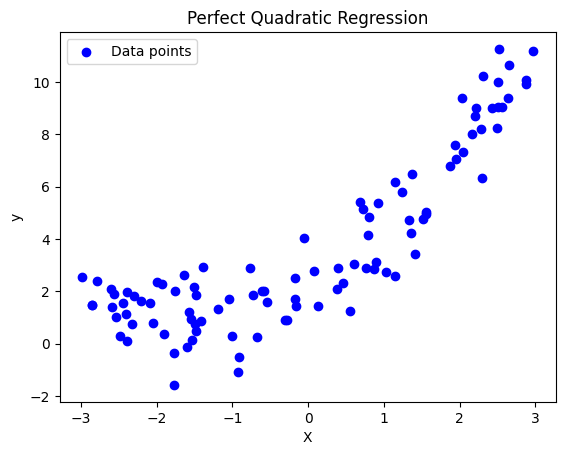

In [4]:
plt.scatter(X, y, color='blue', label='Data points')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Perfect Quadratic Regression')
plt.legend()
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.25)

In [6]:
from sklearn.linear_model import LinearRegression

regression=LinearRegression()


In [7]:
regression.fit(X_train,y_train)

LinearRegression()

In [8]:
print("Coefficient is :: ",regression.coef_)
print("Intercept  is :: ",regression.intercept_)

Coefficient is ::  [[1.50028138]]
Intercept  is ::  [3.84515446]


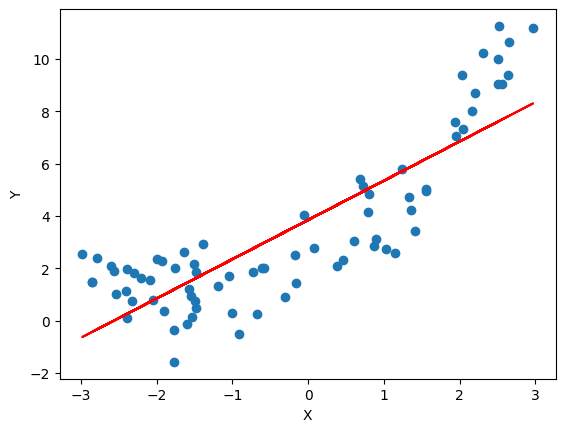

In [9]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train),color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [10]:
y_pred=regression.predict(X_test)

In [11]:
## R squared 

from sklearn.metrics import r2_score

score =r2_score(y_test,y_pred)
print(score)


0.7457303957999677


In [12]:
## Lets apply polynomial transformation
from sklearn.preprocessing import PolynomialFeatures

poly=PolynomialFeatures(degree=3,include_bias=True)

In [13]:
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

In [14]:
X_train_poly

array([[ 1.00000000e+00,  1.41140649e+00,  1.99206829e+00,
         2.81161812e+00],
       [ 1.00000000e+00, -1.77618298e+00,  3.15482599e+00,
        -5.60354824e+00],
       [ 1.00000000e+00, -4.93818884e-02,  2.43857090e-03,
        -1.20421236e-04],
       [ 1.00000000e+00, -1.38244892e+00,  1.91116502e+00,
        -2.64208801e+00],
       [ 1.00000000e+00, -2.98472020e+00,  8.90855470e+00,
        -2.65895432e+01],
       [ 1.00000000e+00, -1.49771918e+00,  2.24316274e+00,
        -3.35962786e+00],
       [ 1.00000000e+00,  2.20263817e+00,  4.85161491e+00,
         1.06863522e+01],
       [ 1.00000000e+00,  2.64954076e+00,  7.02006626e+00,
         1.85999517e+01],
       [ 1.00000000e+00, -5.78282401e-01,  3.34410535e-01,
        -1.93383727e-01],
       [ 1.00000000e+00, -1.77257477e+00,  3.14202130e+00,
        -5.56946768e+00],
       [ 1.00000000e+00, -2.85422954e+00,  8.14662625e+00,
        -2.32523413e+01],
       [ 1.00000000e+00, -2.39129504e+00,  5.71829195e+00,
      

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

regression=LinearRegression()
regression.fit(X_train_poly,y_train)
y_pred=regression.predict(X_test_poly) 



score =r2_score(y_test,y_pred)
print(score)


0.880625868758514


In [16]:
print(regression.coef_)
print(regression.intercept_)

[[0.         1.4487576  0.55267481 0.02605479]]
[2.08031478]


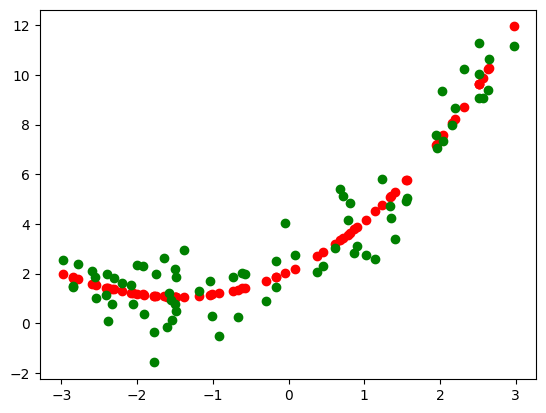

In [17]:
plt.scatter(X_train,regression.predict(X_train_poly),color='red')
plt.scatter(X_train,y_train,color='green')

In [18]:
X_new =np.linspace(-3,3,200).reshape(200,1)
X_new_poly=poly.transform(X_new)


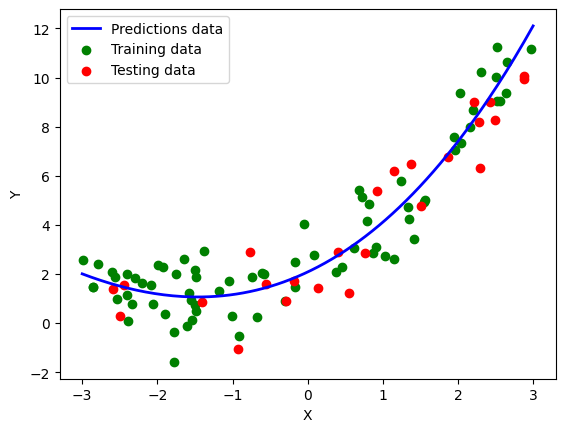

In [19]:
y_new=regression.predict(X_new_poly)
plt.plot(X_new,y_new,color='blue',linewidth=2,label='Predictions data')
plt.scatter(X_train,y_train,color='green',label='Training data')
plt.scatter(X_test,y_test,color='red',label='Testing data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()